## ECSE 415 Assignment 3
#### Imaad Bukhari
#### 261089801

#### Image Classification with NB and CNNN

In [2]:
path = "/Users/imaadbukhari/Documents/ECSE 415/Assignment3/" 

In [3]:

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

#Taken mostly from tutorial 

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
    
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.fc = nn.Linear(4096, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x)) 
        x = F.relu(self.conv2(x))  
        x = self.pool(x)
        x = F.relu(self.conv3(x)) 
        x = F.relu(self.conv4(x)) 
        x = x.view(-1, 4096)
        x = self.fc(x)
        
        return x

model = Net()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


num_epochs = 10

#Help from claude to get GPU working on my device
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS (Apple Silicon GPU)")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA GPU")
else:
    device = torch.device("cpu")
    print("Using CPU")

model = model.to(device)

train_losses = []
train_accuracies = []
test_accuracies = []

#Neural net based on tutorial with a couple of changes to answer question

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        

        optimizer.zero_grad()
        

        outputs = model(inputs)
        

        loss = criterion(outputs, labels)
        

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (i + 1) % 100 == 0:
            batch_loss = running_loss / 100
            accuracy = 100 * correct / total
            print(f'Epoch: {epoch + 1}/{num_epochs}, Batch: {i + 1}, '
                  f'Loss: {batch_loss:.4f}, Accuracy: {accuracy:.2f}%')
            
            train_losses.append(batch_loss)
            train_accuracies.append(accuracy)
            

            running_loss = 0.0
            correct = 0
            total = 0
    
    model.eval()
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
    
    test_accuracy = 100 * test_correct / test_total
    test_accuracies.append(test_accuracy)
    print(f'Epoch: {epoch + 1}/{num_epochs}, Test Accuracy: {test_accuracy:.2f}%')
    print('-' * 60)

print('Finished Training')






Using MPS (Apple Silicon GPU)
Epoch: 1/10, Batch: 100, Loss: 2.2935, Accuracy: 13.06%
Epoch: 1/10, Batch: 200, Loss: 2.2725, Accuracy: 21.12%
Epoch: 1/10, Batch: 300, Loss: 2.2363, Accuracy: 42.78%
Epoch: 1/10, Batch: 400, Loss: 2.1622, Accuracy: 58.84%
Epoch: 1/10, Batch: 500, Loss: 1.9526, Accuracy: 66.81%
Epoch: 1/10, Batch: 600, Loss: 1.3690, Accuracy: 73.78%
Epoch: 1/10, Batch: 700, Loss: 0.8113, Accuracy: 79.22%
Epoch: 1/10, Batch: 800, Loss: 0.6068, Accuracy: 82.28%
Epoch: 1/10, Batch: 900, Loss: 0.5549, Accuracy: 83.28%
Epoch: 1/10, Batch: 1000, Loss: 0.5133, Accuracy: 84.34%
Epoch: 1/10, Batch: 1100, Loss: 0.4789, Accuracy: 85.38%
Epoch: 1/10, Batch: 1200, Loss: 0.4868, Accuracy: 85.06%
Epoch: 1/10, Batch: 1300, Loss: 0.4223, Accuracy: 87.84%
Epoch: 1/10, Batch: 1400, Loss: 0.4145, Accuracy: 87.72%
Epoch: 1/10, Batch: 1500, Loss: 0.4110, Accuracy: 87.38%
Epoch: 1/10, Batch: 1600, Loss: 0.3844, Accuracy: 88.56%
Epoch: 1/10, Batch: 1700, Loss: 0.4283, Accuracy: 87.72%
Epoch: 1/1

The final test accuracy was done in the previous step and ended up being 97.70%

In [10]:
batch_sizes = [4,8,12,16]

for batch_size in batch_sizes:
    trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                            shuffle=True)

    testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)
    
    model = Net()

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


    num_epochs = 10

    #Help from claude to get GPU working on my device
    if torch.backends.mps.is_available():
        device = torch.device("mps")
        print("Using MPS (Apple Silicon GPU)")
    elif torch.cuda.is_available():
        device = torch.device("cuda")
        print("Using CUDA GPU")
    else:
        device = torch.device("cpu")
        print("Using CPU")

    model = model.to(device)

    train_losses = []
    train_accuracies = []
    test_accuracies = []

    #Neural net based on tutorial with a couple of changes to answer question

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for i, data in enumerate(trainloader, 0):

            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            

            optimizer.zero_grad()
            

            outputs = model(inputs)
            

            loss = criterion(outputs, labels)
            

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            if (i + 1) % 100 == 0:
                batch_loss = running_loss / 100
                accuracy = 100 * correct / total
                print(f'Epoch: {epoch + 1}/{num_epochs}, Batch: {i + 1}, '
                    f'Loss: {batch_loss:.4f}, Accuracy: {accuracy:.2f}%')
                
                train_losses.append(batch_loss)
                train_accuracies.append(accuracy)
                

                running_loss = 0.0
                correct = 0
                total = 0
        
        model.eval()
        test_correct = 0
        test_total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()
        
        test_accuracy = 100 * test_correct / test_total
        test_accuracies.append(test_accuracy)
        print(f'Epoch: {epoch + 1}/{num_epochs}, Test Accuracy: {test_accuracy:.2f}%')
        print('-' * 60)

    print('Finished Training for batch size: ', batch_size)
    print('Train Accuracies: ', train_accuracies)
    print('Test Accuracies: ', test_accuracies)
    print('Train Losses: ', train_losses)
    

    

Using MPS (Apple Silicon GPU)
Epoch: 1/10, Batch: 100, Loss: 2.2949, Accuracy: 14.00%
Epoch: 1/10, Batch: 200, Loss: 2.2767, Accuracy: 30.25%
Epoch: 1/10, Batch: 300, Loss: 2.2550, Accuracy: 38.25%
Epoch: 1/10, Batch: 400, Loss: 2.2095, Accuracy: 49.25%
Epoch: 1/10, Batch: 500, Loss: 2.1254, Accuracy: 49.50%
Epoch: 1/10, Batch: 600, Loss: 1.9122, Accuracy: 57.75%
Epoch: 1/10, Batch: 700, Loss: 1.3601, Accuracy: 67.00%
Epoch: 1/10, Batch: 800, Loss: 0.9048, Accuracy: 74.00%
Epoch: 1/10, Batch: 900, Loss: 0.6914, Accuracy: 77.25%
Epoch: 1/10, Batch: 1000, Loss: 0.6878, Accuracy: 78.25%
Epoch: 1/10, Batch: 1100, Loss: 0.5611, Accuracy: 83.25%
Epoch: 1/10, Batch: 1200, Loss: 0.5106, Accuracy: 86.50%
Epoch: 1/10, Batch: 1300, Loss: 0.4986, Accuracy: 85.00%
Epoch: 1/10, Batch: 1400, Loss: 0.5128, Accuracy: 83.75%
Epoch: 1/10, Batch: 1500, Loss: 0.5256, Accuracy: 83.50%
Epoch: 1/10, Batch: 1600, Loss: 0.5154, Accuracy: 83.25%
Epoch: 1/10, Batch: 1700, Loss: 0.5191, Accuracy: 86.75%
Epoch: 1/1

Retraining it with batch sizes of 4,8,12,16 , we obtained test accuracies of 98.86%, 98.45%, 98.45%, 98.36% respectively. There was slight variation in accuracy, but quite a large tradeoff with training time.

I'll try retraining the model with a sigmoid function and tanh. 

In [4]:
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False)

class SigmoidNet(nn.Module):
    def __init__(self):
        super(SigmoidNet, self).__init__()
    
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.fc = nn.Linear(4096, 10)
        
    def forward(self, x):
        x = torch.sigmoid(self.conv1(x)) 
        x = torch.sigmoid(self.conv2(x))  
        x = self.pool(x)
        x = torch.sigmoid(self.conv3(x)) 
        x = torch.sigmoid(self.conv4(x)) 
        x = x.view(-1, 4096)
        x = self.fc(x)
        
        return x

model_sig = SigmoidNet()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_sig.parameters(), lr=0.001)


num_epochs = 10

#Help from claude to get GPU working on my device
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS (Apple Silicon GPU)")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA GPU")
else:
    device = torch.device("cpu")
    print("Using CPU")

model_sig = model_sig.to(device)

train_losses = []
train_accuracies = []
test_accuracies = []

#Neural net based on tutorial with a couple of changes to answer question

for epoch in range(num_epochs):
    model_sig.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        

        optimizer.zero_grad()
        

        outputs = model_sig(inputs)
        

        loss = criterion(outputs, labels)
        

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (i + 1) % 100 == 0:
            batch_loss = running_loss / 100
            accuracy = 100 * correct / total
            print(f'Epoch: {epoch + 1}/{num_epochs}, Batch: {i + 1}, '
                  f'Loss: {batch_loss:.4f}, Accuracy: {accuracy:.2f}%')
            
            train_losses.append(batch_loss)
            train_accuracies.append(accuracy)
            

            running_loss = 0.0
            correct = 0
            total = 0
    
    model_sig.eval()
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model_sig(images)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
    
    test_accuracy = 100 * test_correct / test_total
    test_accuracies.append(test_accuracy)
    print(f'Epoch: {epoch + 1}/{num_epochs}, Test Accuracy: {test_accuracy:.2f}%')
    print('-' * 60)

print('Finished Training for Sigmoid')
print('Train Accuracies: ', train_accuracies)
print('Test Accuracies: ', test_accuracies)
print('Train Losses: ', train_losses)

Using MPS (Apple Silicon GPU)
Epoch: 1/10, Batch: 100, Loss: 2.3136, Accuracy: 9.62%
Epoch: 1/10, Batch: 200, Loss: 2.3090, Accuracy: 10.78%
Epoch: 1/10, Batch: 300, Loss: 2.3098, Accuracy: 10.34%
Epoch: 1/10, Batch: 400, Loss: 2.3095, Accuracy: 10.66%
Epoch: 1/10, Batch: 500, Loss: 2.3101, Accuracy: 11.28%
Epoch: 1/10, Batch: 600, Loss: 2.3071, Accuracy: 9.69%
Epoch: 1/10, Batch: 700, Loss: 2.3095, Accuracy: 10.31%
Epoch: 1/10, Batch: 800, Loss: 2.3105, Accuracy: 9.69%
Epoch: 1/10, Batch: 900, Loss: 2.3079, Accuracy: 10.78%
Epoch: 1/10, Batch: 1000, Loss: 2.3087, Accuracy: 10.38%
Epoch: 1/10, Batch: 1100, Loss: 2.3057, Accuracy: 11.47%
Epoch: 1/10, Batch: 1200, Loss: 2.3082, Accuracy: 10.72%
Epoch: 1/10, Batch: 1300, Loss: 2.3082, Accuracy: 11.03%
Epoch: 1/10, Batch: 1400, Loss: 2.3094, Accuracy: 9.50%
Epoch: 1/10, Batch: 1500, Loss: 2.3092, Accuracy: 10.44%
Epoch: 1/10, Batch: 1600, Loss: 2.3092, Accuracy: 10.06%
Epoch: 1/10, Batch: 1700, Loss: 2.3107, Accuracy: 10.31%
Epoch: 1/10, B

In [13]:
class TanhNet(nn.Module):
    def __init__(self):
        super(TanhNet, self).__init__()
    
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.fc = nn.Linear(4096, 10)
        
    def forward(self, x):
        x = torch.tanh(self.conv1(x)) 
        x = torch.tanh(self.conv2(x))  
        x = self.pool(x)
        x = torch.tanh(self.conv3(x)) 
        x = torch.tanh(self.conv4(x)) 
        x = x.view(-1, 4096)
        x = self.fc(x)
        
        return x

model_tanh = TanhNet()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_tanh.parameters(), lr=0.001)


num_epochs = 10

#Help from claude to get GPU working on my device
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS (Apple Silicon GPU)")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA GPU")
else:
    device = torch.device("cpu")
    print("Using CPU")

model_tanh = model_tanh.to(device)

train_losses = []
train_accuracies = []
test_accuracies = []

#Neural net based on tutorial with a couple of changes to answer question

for epoch in range(num_epochs):
    model_tanh.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        

        optimizer.zero_grad()
        

        outputs = model_tanh(inputs)
        

        loss = criterion(outputs, labels)
        

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (i + 1) % 100 == 0:
            batch_loss = running_loss / 100
            accuracy = 100 * correct / total
            print(f'Epoch: {epoch + 1}/{num_epochs}, Batch: {i + 1}, '
                  f'Loss: {batch_loss:.4f}, Accuracy: {accuracy:.2f}%')
            
            train_losses.append(batch_loss)
            train_accuracies.append(accuracy)
            

            running_loss = 0.0
            correct = 0
            total = 0
    
    model_tanh.eval()
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model_tanh(images)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
    
    test_accuracy = 100 * test_correct / test_total
    test_accuracies.append(test_accuracy)
    print(f'Epoch: {epoch + 1}/{num_epochs}, Test Accuracy: {test_accuracy:.2f}%')
    print('-' * 60)

print('Finished Training for tanh')
print('Train Accuracies: ', train_accuracies)
print('Test Accuracies: ', test_accuracies)
print('Train Losses: ', train_losses)

Using MPS (Apple Silicon GPU)
Epoch: 1/10, Batch: 100, Loss: 2.2602, Accuracy: 32.81%
Epoch: 1/10, Batch: 200, Loss: 2.1632, Accuracy: 60.62%
Epoch: 1/10, Batch: 300, Loss: 1.9849, Accuracy: 68.56%
Epoch: 1/10, Batch: 400, Loss: 1.6494, Accuracy: 71.31%
Epoch: 1/10, Batch: 500, Loss: 1.2532, Accuracy: 75.50%
Epoch: 1/10, Batch: 600, Loss: 0.9627, Accuracy: 78.12%
Epoch: 1/10, Batch: 700, Loss: 0.7636, Accuracy: 81.72%
Epoch: 1/10, Batch: 800, Loss: 0.6903, Accuracy: 81.53%
Epoch: 1/10, Batch: 900, Loss: 0.6369, Accuracy: 82.81%
Epoch: 1/10, Batch: 1000, Loss: 0.5975, Accuracy: 83.72%
Epoch: 1/10, Batch: 1100, Loss: 0.5440, Accuracy: 85.19%
Epoch: 1/10, Batch: 1200, Loss: 0.5222, Accuracy: 85.50%
Epoch: 1/10, Batch: 1300, Loss: 0.4808, Accuracy: 86.50%
Epoch: 1/10, Batch: 1400, Loss: 0.4957, Accuracy: 85.69%
Epoch: 1/10, Batch: 1500, Loss: 0.4816, Accuracy: 86.59%
Epoch: 1/10, Batch: 1600, Loss: 0.4707, Accuracy: 86.94%
Epoch: 1/10, Batch: 1700, Loss: 0.4726, Accuracy: 86.56%
Epoch: 1/1

The sigmoid activation function performed awfully for this example. I'm not sure if I made a mistake or not but it only achieved an accuracy of 11.35%. I'm not 100% sure why this occurs but my speculation is that it has to do with the extremely small gradients that occur at the extremes. Might have also had to do with batch size, but I kept it at 32 so that training time would be less. 

The Tanh function performed very well compared to the sigmoid, with an accuracy of 95.23%, but still relatively worse than the ReLU examples. I found it surprising that it worked so much better than the sigmoid function since they look quite similar, but I guess the sharper gradient in the Tanh function throughout the network culminated in a much more robust network. 

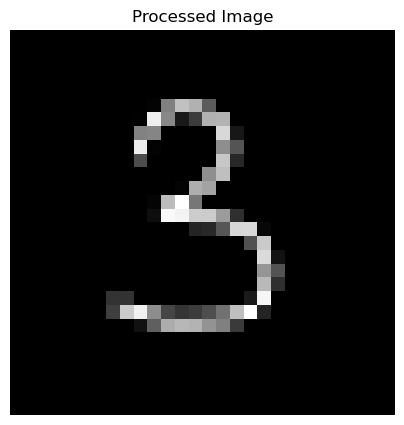

test1.png: Predicted = 3


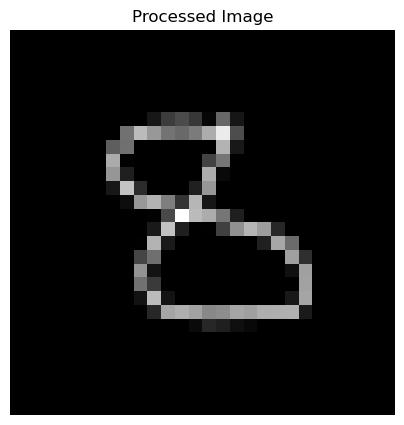

test2.png: Predicted = 3


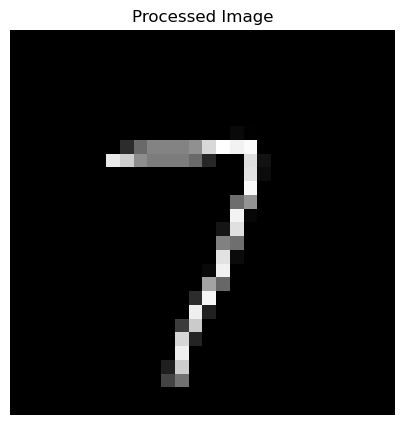

test3.png: Predicted = 7


In [ ]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.ndimage import center_of_mass

# Initially i used a different approach but after some testing and help from claude I figured the center of mass approach would be better
def process_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    
    cy, cx = center_of_mass(thresh)

    rows, cols = thresh.shape
    
    shift_x = np.round(cols/2.0 - cx).astype(int)
    shift_y = np.round(rows/2.0 - cy).astype(int)
    
    M = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
    centered = cv2.warpAffine(thresh, M, (cols, rows), borderValue=0)

    padded = cv2.copyMakeBorder(centered, 4, 4, 4, 4, cv2.BORDER_CONSTANT, value=0)
    processed = cv2.resize(padded, (28, 28), interpolation=cv2.INTER_AREA)
    
    return processed

def predict_digit(image_path, model):

    image = process_image(image_path)
    
    image_tensor = torch.tensor(image, dtype=torch.float32)
    image_tensor = image_tensor.unsqueeze(0).unsqueeze(0)
    
    image_tensor = (image_tensor - 0.1307) / 0.3081
    image_tensor = image_tensor.to(device)
    
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted = torch.max(output, 1)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap='gray')
    plt.title(f"Processed Image")
    plt.axis('off')
    plt.show()
    
    return predicted.item()

for test_image in ["test1.png", "test2.png", "test3.png"]:
    predicted = predict_digit(path + test_image, model)
    print(f"{test_image}: Predicted = {predicted}")

It performed okay, but was not able to classify the 8 correctly. 8 sort of looks like a 3 so it could be that but maybe some other fine tuning would help. 

Training Naive Bayes classifier...


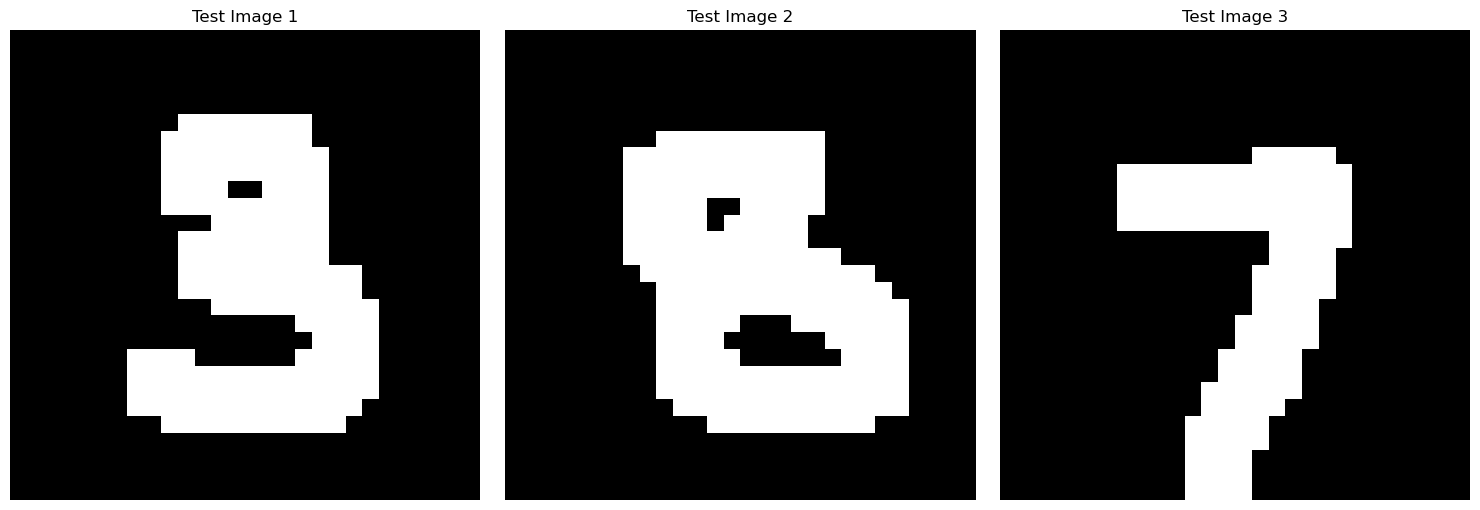


===== Results for test1.png =====
Uniform Prior Prediction: 3
Class probabilities with uniform prior:
  Class 0: 0.000000
  Class 1: 0.000000
  Class 2: 0.000000
  Class 3: 1.000000
  Class 4: 0.000000
  Class 5: 0.000000
  Class 6: 0.000000
  Class 7: 0.000000
  Class 8: 0.000000
  Class 9: 0.000000

Frequency Prior Prediction: 3
Class probabilities with frequency prior:
  Class 0: 0.000000
  Class 1: 0.000000
  Class 2: 0.000000
  Class 3: 1.000000
  Class 4: 0.000000
  Class 5: 0.000000
  Class 6: 0.000000
  Class 7: 0.000000
  Class 8: 0.000000
  Class 9: 0.000000


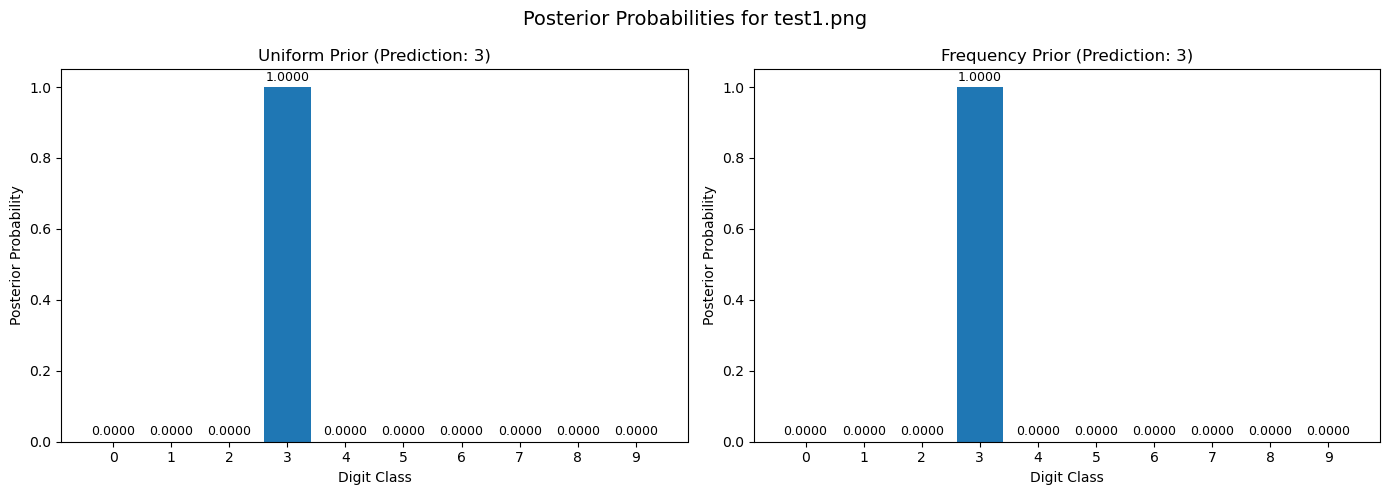


===== Results for test2.png =====
Uniform Prior Prediction: 8
Class probabilities with uniform prior:
  Class 0: 0.000000
  Class 1: 0.000000
  Class 2: 0.000000
  Class 3: 0.000000
  Class 4: 0.000000
  Class 5: 0.000371
  Class 6: 0.000000
  Class 7: 0.000000
  Class 8: 0.999629
  Class 9: 0.000000

Frequency Prior Prediction: 8
Class probabilities with frequency prior:
  Class 0: 0.000000
  Class 1: 0.000000
  Class 2: 0.000000
  Class 3: 0.000000
  Class 4: 0.000000
  Class 5: 0.000344
  Class 6: 0.000000
  Class 7: 0.000000
  Class 8: 0.999656
  Class 9: 0.000000


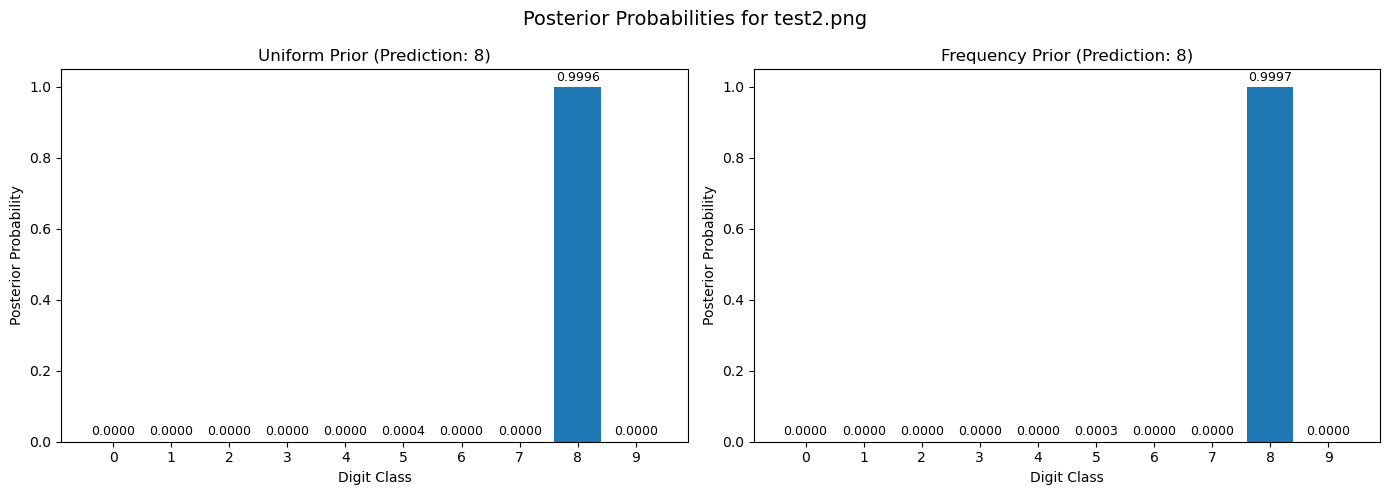


===== Results for test3.png =====
Uniform Prior Prediction: 7
Class probabilities with uniform prior:
  Class 0: 0.000000
  Class 1: 0.000000
  Class 2: 0.000000
  Class 3: 0.000000
  Class 4: 0.000000
  Class 5: 0.000000
  Class 6: 0.000000
  Class 7: 1.000000
  Class 8: 0.000000
  Class 9: 0.000000

Frequency Prior Prediction: 7
Class probabilities with frequency prior:
  Class 0: 0.000000
  Class 1: 0.000000
  Class 2: 0.000000
  Class 3: 0.000000
  Class 4: 0.000000
  Class 5: 0.000000
  Class 6: 0.000000
  Class 7: 1.000000
  Class 8: 0.000000
  Class 9: 0.000000


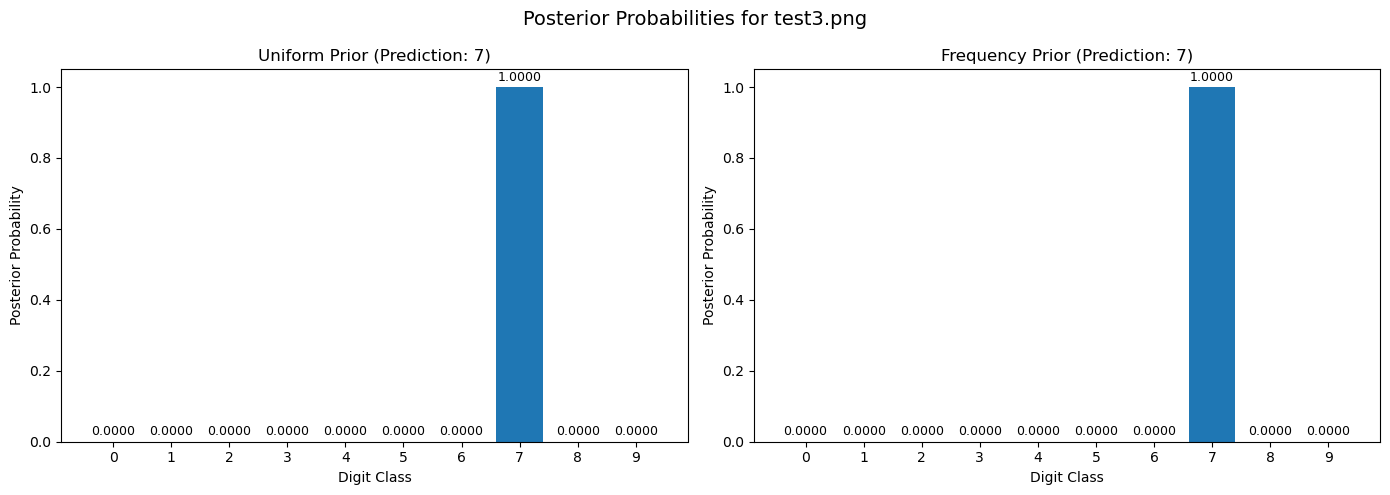


Evaluating on MNIST test set...

Naive Bayes Accuracy on MNIST Test Set with frequency prior: 84.27%

===== SUMMARY =====
Image		Uniform Prior	Frequency Prior
test1.png	3		3
test2.png	8		8
test3.png	7		7


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from scipy.ndimage import center_of_mass

#I know NB classification pretty well from ECSE 551, I used copilot a bit to help with implementation. 
#I went for binary images for this so I could use a bernoulli style approach
#Employed laplace smoothing which i learned in ECSE 551
#I went for dilated images based on a recommendation from a classmate when I mentioned my NB was not performing well

images = ["test1.png", "test2.png", "test3.png"]

def center_resize(img):

    _, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY)
    cy, cx = center_of_mass(img)
    
    rows, cols = img.shape
    shift_x = np.round(cols/2.0 - cx).astype(int)
    shift_y = np.round(rows/2.0 - cy).astype(int)
    
    M = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
    shifted = cv2.warpAffine(img, M, (cols, rows), borderValue=0)
    
    shifted = cv2.copyMakeBorder(shifted, 4, 4, 4, 4, cv2.BORDER_CONSTANT, value=0)
    resized = cv2.resize(shifted, (28, 28), interpolation=cv2.INTER_NEAREST)
    
    return resized

def train_naive_bayes():

    pixel_counts = np.zeros((10, 28, 28))
    class_counts = np.zeros(10)
    
    for img, label in train_dataset:
        binary_img = (img.numpy().squeeze() > 0.5).astype(np.uint8)
        pixel_counts[label] += binary_img
        class_counts[label] += 1
    
    pixel_probs = (pixel_counts + 1) / (class_counts[:, None, None] + 2)
    
    total_samples = class_counts.sum()
    class_priors = class_counts / total_samples
    
    return pixel_probs, class_priors

def naive_bayes_predict(test_img_tensor, uniform_prior=True):
   
    test_img = test_img_tensor.squeeze().numpy().astype(np.uint8)

    log_posteriors = []
    for y in range(10):
        px1 = pixel_probs[y]
        px0 = 1 - px1
        
        log_likelihood = test_img * np.log(px1) + (1 - test_img) * np.log(px0)
        total_log_likelihood = np.sum(log_likelihood)
        
    
        log_posterior = total_log_likelihood - np.log(10)
        log_posteriors.append(log_posterior)
    

    log_posteriors = np.array(log_posteriors)
    posterior_probs = np.exp(log_posteriors - np.max(log_posteriors))
    posterior_probs /= posterior_probs.sum()

    return posterior_probs

def predict_naive_bayes_prior(test_img_tensor):

    x = test_img_tensor.squeeze().numpy().astype(np.uint8)
    
    log_posteriors = []
    for y in range(10):
        px1 = pixel_probs[y]
        px0 = 1 - px1

        log_likelihood = x * np.log(px1) + (1-x) * np.log(px0)
        total_log_likelihood = np.sum(log_likelihood)

  
        log_prior = np.log(class_priors[y])
        log_posteriors.append(total_log_likelihood + log_prior)
    
    log_posteriors = np.array(log_posteriors)
    posterior_probs = np.exp(log_posteriors - np.max(log_posteriors))
    posterior_probs /= posterior_probs.sum()

    return posterior_probs


transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


print("Training Naive Bayes classifier...")
pixel_probs, class_priors = train_naive_bayes()


processed = []
for idx in range(3):
    img = cv2.imread(path + images[idx], cv2.IMREAD_GRAYSCALE)
    img = cv2.bitwise_not(img)
    img = center_resize(img)
    
    kernel = np.ones((4, 4), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    _, img = cv2.threshold(img, 50, 1, cv2.THRESH_BINARY)
    
    img_tensor = torch.tensor(img, dtype=torch.float32).unsqueeze(0)
    processed.append(img_tensor)


plt.figure(figsize=(15, 5))
for idx, img in enumerate(processed):
    plt.subplot(1, 3, idx+1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Test Image {idx+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()


for idx, img in enumerate(processed):
    print(f"\n===== Results for {images[idx]} =====")
    
 
    uniform_probs = naive_bayes_predict(img)
    uniform_pred = np.argmax(uniform_probs)
    

    freq_probs = predict_naive_bayes_prior(img)
    freq_pred = np.argmax(freq_probs)
    

    print(f"Uniform Prior Prediction: {uniform_pred}")
    print("Class probabilities with uniform prior:")
    for i, prob in enumerate(uniform_probs):
        print(f"  Class {i}: {prob:.6f}")
    
    print(f"\nFrequency Prior Prediction: {freq_pred}")
    print("Class probabilities with frequency prior:")
    for i, prob in enumerate(freq_probs):
        print(f"  Class {i}: {prob:.6f}")
    

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    

    bars1 = ax1.bar(range(10), uniform_probs)
    ax1.set_xticks(range(10))
    ax1.set_xlabel('Digit Class')
    ax1.set_ylabel('Posterior Probability')
    ax1.set_title(f'Uniform Prior (Prediction: {uniform_pred})')
    

    for i, bar in enumerate(bars1):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{uniform_probs[i]:.4f}', ha='center', va='bottom', fontsize=9)
    

    bars2 = ax2.bar(range(10), freq_probs)
    ax2.set_xticks(range(10))
    ax2.set_xlabel('Digit Class')
    ax2.set_ylabel('Posterior Probability')
    ax2.set_title(f'Frequency Prior (Prediction: {freq_pred})')
    

    for i, bar in enumerate(bars2):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{freq_probs[i]:.4f}', ha='center', va='bottom', fontsize=9)
    
    plt.suptitle(f'Posterior Probabilities for {images[idx]}', fontsize=14)
    plt.tight_layout()
    plt.show()


print("\nEvaluating on MNIST test set...")
bayes_test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

correct = 0
total = 0

for img, label in bayes_test_loader:
    bin_img = (img > 0.5).float()
    probs = predict_naive_bayes_prior(bin_img)
    
    pred = np.argmax(probs)
    if pred == label.item():
        correct += 1
    total += 1

accuracy = 100 * correct / total
print(f"\nNaive Bayes Accuracy on MNIST Test Set with frequency prior: {accuracy:.2f}%")


print("\n===== SUMMARY =====")
print("Image\t\tUniform Prior\tFrequency Prior")
for idx, img in enumerate(processed):
    uniform_probs = naive_bayes_predict(img)
    freq_probs = predict_naive_bayes_prior(img)
    
    uniform_pred = np.argmax(uniform_probs)
    freq_pred = np.argmax(freq_probs)
    
    print(f"{images[idx]}\t{uniform_pred}\t\t{freq_pred}")

I had a lot of trouble with this part, and it ended up being how I was centering the images. It went from 50% accuracy on MNIST test set to almost 85%, and 0 correct test predictions to 3. 

The posterior probabilities were almost exactly the same for two reasons. Firstly, the prior was almost the exact same distribution with the frequency based approach, so it did not make much of an effect. But more importantly and what I found odd, the likelihood estimation was almost 1 for the predicted class for every test prediction. This was odd to me because when it was not working, it was still doing that, so it was very confidently wrong. 

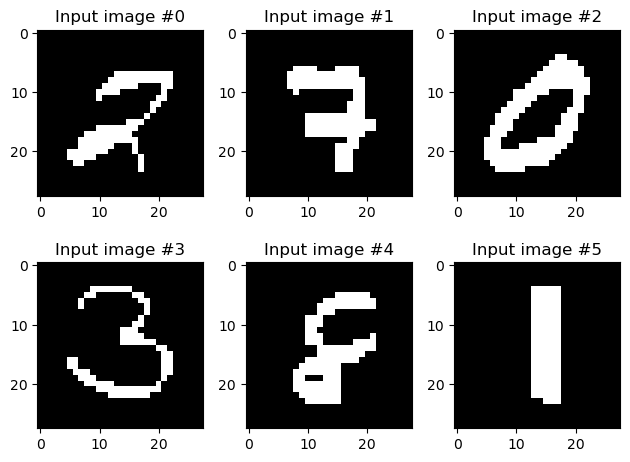

Input #0 prediction: 2
Input #1 prediction: 7
Input #2 prediction: 0
Input #3 prediction: 3
Input #4 prediction: 8
Input #5 prediction: 1

===== DETECTION SUMMARY =====
detect1.png: Detected digits: 2, 7
detect2.png: Detected digits: 0, 3
detect3.png: Detected digits: 8, 1


In [8]:
import cv2
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import center_of_mass

two_digit_images = ["detect1.png", "detect2.png", "detect3.png"]
transform = transforms.Compose([transforms.ToTensor()])


def split_digits(image_path):
    """Extract individual digits from an image using contours"""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, thresh = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    digit_images = []
    for count in sorted(contours, key=lambda c: cv2.boundingRect(c)[0]):
        x, y, w, h = cv2.boundingRect(count)
        digit_crop = thresh[y:y+h, x:x+w]
        
        digit_crop = center_resize(digit_crop)
        digit_images.append(digit_crop)
    return digit_images

# Process all digit images
processed = []
for idx in range(3):
    images = split_digits(path + two_digit_images[idx])
    for img in images:
        # Apply erosion
        kernel = np.ones((1, 3))
        img = cv2.erode(img, kernel, iterations=1)
        
        # Convert to tensor
        img = Image.fromarray(img)
        tensor = transform(img)
        
        # Binarize
        tensor = (tensor > 0.).float()
        processed.append(tensor)

# Display all processed digits
input_tensor = torch.stack(processed).to(device)
for i in range(len(processed)):
    plt.subplot(2, 3, i+1)
    plt.title(f"Input image #{i}")
    plt.imshow(input_tensor[i][0].cpu().numpy(), cmap='gray')
plt.tight_layout()
plt.show()

# Make predictions
model.eval()
with torch.no_grad():
    output = model(input_tensor)
    predictions = torch.argmax(output, dim=1)

# Print predictions
for i, pred in enumerate(predictions):
    print(f"Input #{i} prediction: {pred.item()}")

# Group results by image
results = {}
digit_count = 0
for idx in range(3):
    image_path = path + two_digit_images[idx]
    images = split_digits(image_path)
    num_digits = len(images)
    
    image_preds = predictions[digit_count:digit_count+num_digits].cpu().numpy()
    results[two_digit_images[idx]] = image_preds
    digit_count += num_digits

# Print summary
print("\n===== DETECTION SUMMARY =====")
for img_name, digits in results.items():
    digits_str = ", ".join([str(d.item()) for d in digits])
    print(f"{img_name}: Detected digits: {digits_str}")


Once again, I had quite a bit of trouble in the process to obtain these results, and it came down to preprocessing again. I really had to experiment with different approaches to splitting up the digits and centering them, and then different erosion kernels as well. 

I think the first limitation is that it was really only due to this preprocessing that the results were so good, and that is probably only applicable to this specific test set. 

Specifically for this neural net, it was trained on grayscale, 28x28, upright images with no background noise. Anything outside of that it would probably struggle with. This is more representative of the limitations in the training data than the architecture of the CNN. 

In the example below we can see this is the case when we rotate one of the test samples that performed well. 

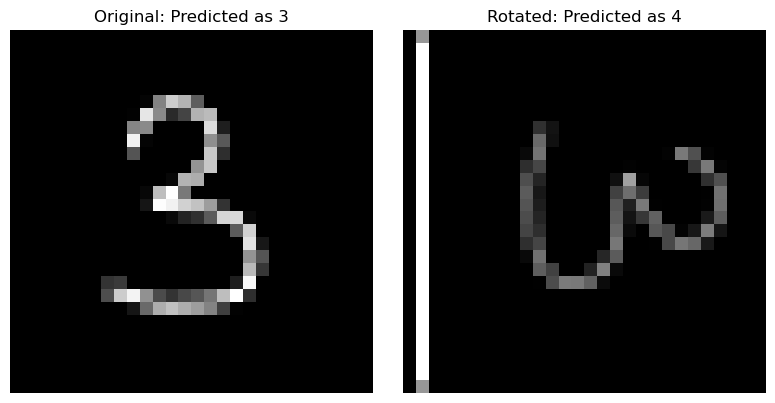

Original image predicted as: 3
Rotated image predicted as: 4


In [ ]:
import cv2
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import center_of_mass

#Quick demonstration of effect of rotation with help from copilot


transform = transforms.Compose([transforms.ToTensor()])

test_image_path = path + "test1.png"

def preprocess_and_classify(img):

    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    

    img_inv = cv2.bitwise_not(img)
    

    cy, cx = center_of_mass(img_inv)
    
    rows, cols = img.shape
    shift_x = np.round(cols/2.0 - cx).astype(int)
    shift_y = np.round(rows/2.0 - cy).astype(int)
    
    M = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
    centered = cv2.warpAffine(img_inv, M, (cols, rows), borderValue=0)
    
  
    padded = cv2.copyMakeBorder(centered, 4, 4, 4, 4, cv2.BORDER_CONSTANT, value=0)
    resized = cv2.resize(padded, (28, 28), interpolation=cv2.INTER_AREA)
    

    img_pil = Image.fromarray(resized)
    tensor = transform(img_pil)
    
    model.eval()
    with torch.no_grad():
        output = model(tensor.unsqueeze(0).to(device))
        prediction = torch.argmax(output, dim=1).item()
    
    return resized, prediction

original_img = cv2.imread(test_image_path)

rows, cols = original_img.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), -90, 1)
rotated_img = cv2.warpAffine(original_img, M, (cols, rows))

orig_processed, orig_pred = preprocess_and_classify(original_img)
rot_processed, rot_pred = preprocess_and_classify(rotated_img)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(orig_processed, cmap='gray')
axes[0].set_title(f"Original: Predicted as {orig_pred}")
axes[0].axis('off')

axes[1].imshow(rot_processed, cmap='gray')
axes[1].set_title(f"Rotated: Predicted as {rot_pred}")
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Original image predicted as: {orig_pred}")
print(f"Rotated image predicted as: {rot_pred}")

### Stereo Vision

Found 73173 keypoints in image 1
Found 64375 keypoints in image 2
Found 1260 good matches after ratio test


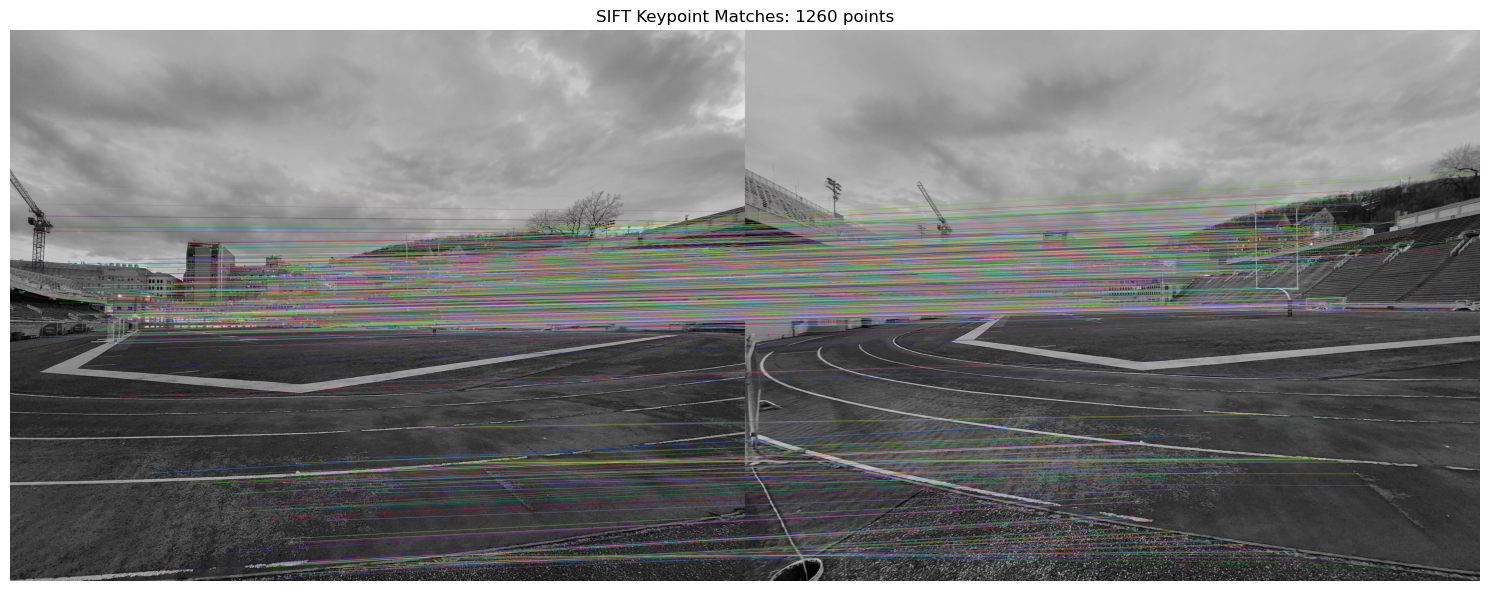

Found 1185 inlier matches after RANSAC


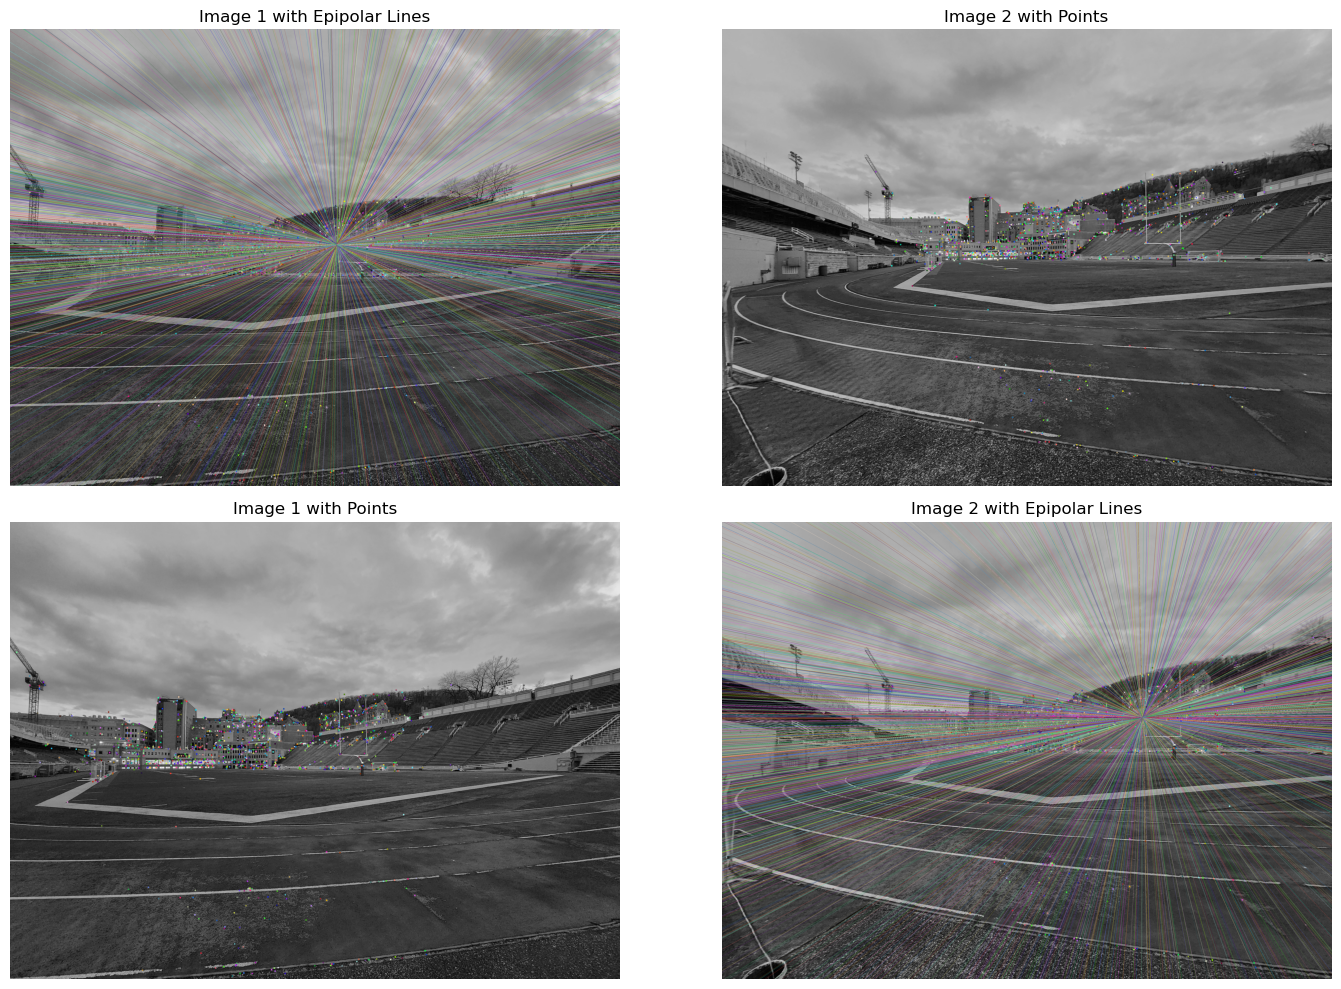

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img1_path = path + "img1.jpeg"
img2_path = path + "img2.jpeg"

#Heavily inspired by tutorial

def drawlines(img1, img2, lines, pts1, pts2):

    row, col = img1.shape

    img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

    for r, pt1, pt2 in zip(lines, pts1, pts2):

        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [col, -(r[2]+r[0]*col)/r[1]])

        img1 = cv2.line(img1, (x0,y0), (x1,y1), color, 1)
        img1 = cv2.circle(img1, tuple(pt1), 5, color, -1)
        img2 = cv2.circle(img2, tuple(pt2), 5, color, -1)
    return img1, img2

def compute_sift_matches_and_epipolar_lines(img1_path, img2_path):

    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
    

    
    sift = cv2.SIFT_create()

    bfMatcher = cv2.BFMatcher(cv2.NORM_L2)
    

    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    
    print(f"Found {len(kp1)} keypoints in image 1")
    print(f"Found {len(kp2)} keypoints in image 2")

    matches = bfMatcher.knnMatch(des1, des2, k=2)  
    
    good_matches = []
    pts1 = []
    pts2 = []
    
    for i, (m, n) in enumerate(matches):
        if m.distance < 0.6 * n.distance:  
            good_matches.append(m)
            pts2.append(kp2[m.trainIdx].pt)
            pts1.append(kp1[m.queryIdx].pt)
    
    print(f"Found {len(good_matches)} good matches after ratio test")
    

    pts1 = np.int32(pts1)
    pts2 = np.int32(pts2)
    

    match_img = cv2.drawMatches(
        img1, kp1, img2, kp2, good_matches, None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    
    plt.figure(figsize=(15, 6))
    plt.title(f"SIFT Keypoint Matches: {len(good_matches)} points")
    plt.imshow(match_img)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_LMEDS) 
    
  
    pts1 = pts1[mask.ravel() == 1]
    pts2 = pts2[mask.ravel() == 1]
    
    print(f"Found {len(pts1)} inlier matches after RANSAC")
    

    lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F)
    lines1 = lines1.reshape(-1, 3)
    

    img1_with_lines, img2_with_points = drawlines(img1, img2, lines1, pts1, pts2)
    

    lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
    lines2 = lines2.reshape(-1, 3)

    img2_with_lines, img1_with_points = drawlines(img2, img1, lines2, pts2, pts1)
    

    plt.figure(figsize=(15, 10))
    plt.subplot(221)
    plt.imshow(img1_with_lines)
    plt.title("Image 1 with Epipolar Lines")
    plt.axis('off')
    
    plt.subplot(222)
    plt.imshow(img2_with_points)
    plt.title("Image 2 with Points")
    plt.axis('off')
    
    plt.subplot(223)
    plt.imshow(img1_with_points)
    plt.title("Image 1 with Points")
    plt.axis('off')
    
    plt.subplot(224)
    plt.imshow(img2_with_lines)
    plt.title("Image 2 with Epipolar Lines")
    plt.axis('off')
    
    plt.tight_layout()
    plt.pause(0.01)
    plt.show()
    
    return kp1, kp2, good_matches, F, pts1, pts2

kp1, kp2, good_matches, F, pts1, pts2 = compute_sift_matches_and_epipolar_lines(img1_path, img2_path)


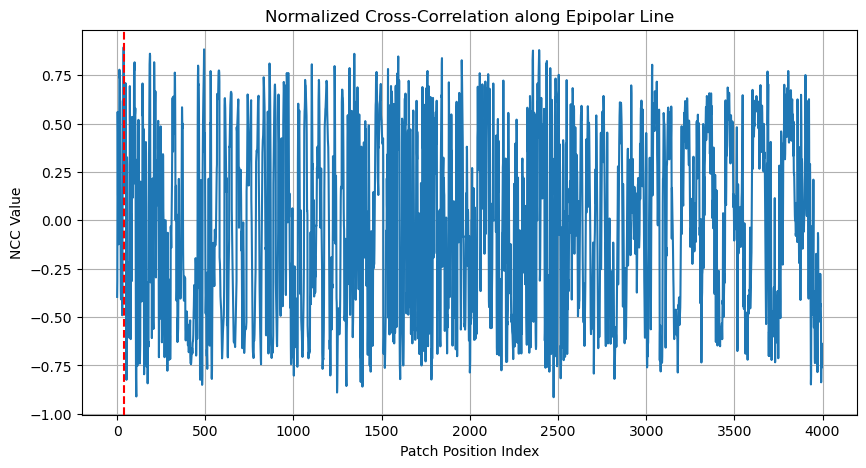

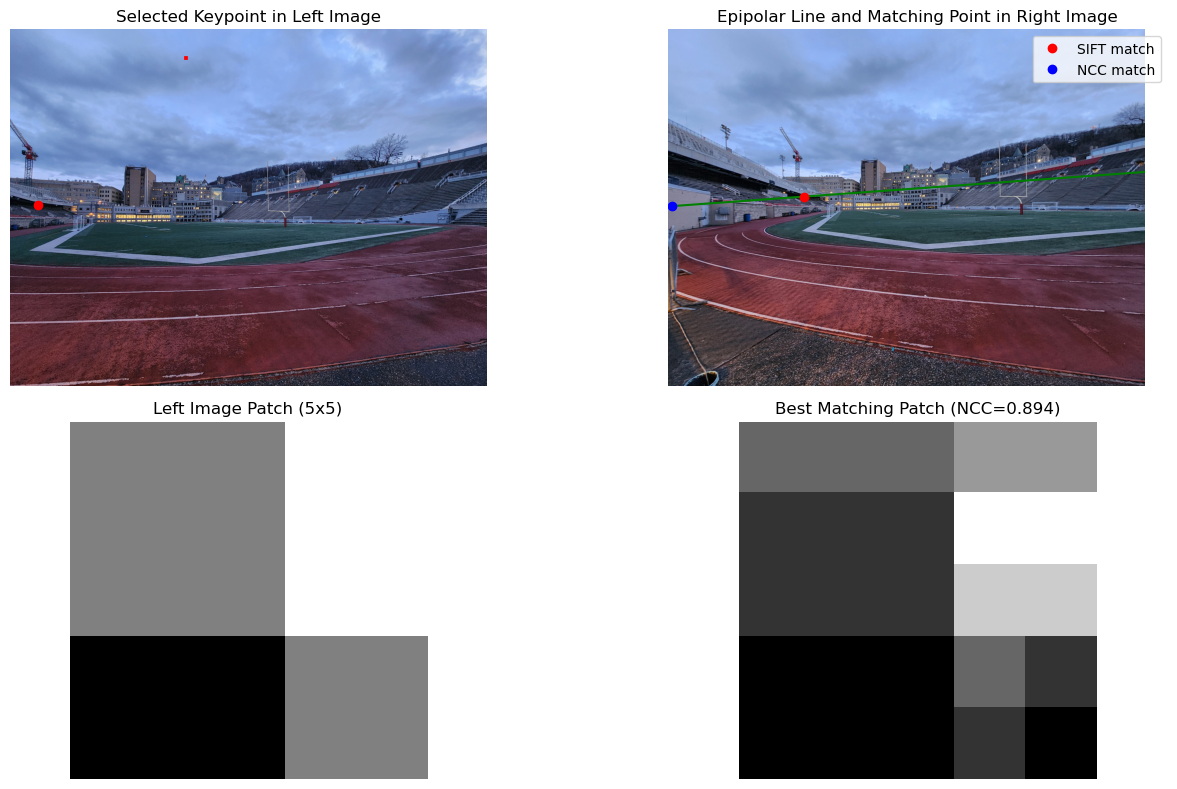

Original SIFT match: [1143 1404]
Best NCC match found at: (39, 1484)
Best NCC value: 0.8944
Distance between SIFT match and NCC match: 1106.89 pixels


In [38]:
#help from copilot on this 

def extract_patch_and_match_along_epipolar():

    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    best_match_idx = 10 
    
    
    pt_left = pts1[best_match_idx]
    pt_right = pts2[best_match_idx]
    

    patch_size = 5
    half_size = patch_size // 2
    
 
    y_left, x_left = pt_left
    y_left_start = max(0, y_left - half_size)
    y_left_end = min(img1_gray.shape[0], y_left + half_size + 1)
    x_left_start = max(0, x_left - half_size)
    x_left_end = min(img1_gray.shape[1], x_left + half_size + 1)
    
    left_patch = img1_gray[y_left_start:y_left_end, x_left_start:x_left_end]

    if left_patch.shape[0] < patch_size or left_patch.shape[1] < patch_size:
        padded_patch = np.zeros((patch_size, patch_size))
        padded_patch[:left_patch.shape[0], :left_patch.shape[1]] = left_patch
        left_patch = padded_patch

    line_right = cv2.computeCorrespondEpilines(np.array([pt_left]).reshape(-1, 1, 2), 1, F)
    line_right = line_right.reshape(-1, 3)[0]  
    

    ncc_values = []
    patch_positions = []
    
  
    width = img2_gray.shape[1]
    

    for x_right in range(half_size, width - half_size):
      
        if abs(line_right[1]) < 1e-10: 
            continue
            
        y_right = int((-line_right[0] * x_right - line_right[2]) / line_right[1])
        
     
        if y_right < half_size or y_right >= img2_gray.shape[0] - half_size:
            continue
        

        right_patch = img2_gray[y_right - half_size:y_right + half_size + 1, 
                                x_right - half_size:x_right + half_size + 1]
        

        if right_patch.shape != (patch_size, patch_size):
            continue
        
        left_patch_norm = (left_patch - np.mean(left_patch)) / (np.std(left_patch) + 1e-10)
        right_patch_norm = (right_patch - np.mean(right_patch)) / (np.std(right_patch) + 1e-10)
        

        ncc = np.sum(left_patch_norm * right_patch_norm) / (patch_size * patch_size)
        

        ncc_values.append(ncc)
        patch_positions.append((x_right, y_right))
    


    best_idx = np.argmax(ncc_values)
    best_ncc = ncc_values[best_idx]
    best_match_position = patch_positions[best_idx]


    plt.figure(figsize=(10, 5))
    plt.plot(range(len(ncc_values)), ncc_values)
    plt.axvline(x=best_idx, color='r', linestyle='--')
    plt.title(f"Normalized Cross-Correlation along Epipolar Line")
    plt.xlabel("Patch Position Index")
    plt.ylabel("NCC Value")
    plt.grid(True)
    plt.show()
    
  
    plt.figure(figsize=(15, 8))

    plt.subplot(221)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.plot(pt_left[0], pt_left[1], 'ro')
    rect = plt.Rectangle((x_left_start, y_left_start), 
                        x_left_end - x_left_start, 
                        y_left_end - y_left_start, 
                        linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
    plt.title("Selected Keypoint in Left Image")
    plt.axis('off')
    

    plt.subplot(222)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

    x0, y0 = map(int, [0, -line_right[2]/line_right[1]])
    x1, y1 = map(int, [img2.shape[1], -(line_right[2]+line_right[0]*img2.shape[1])/line_right[1]])
    plt.plot([x0, x1], [y0, y1], 'g-')

    plt.plot(pt_right[0], pt_right[1], 'ro', label='SIFT match')

    plt.plot(best_match_position[0], best_match_position[1], 'bo', label='NCC match')
    rect = plt.Rectangle((best_match_position[0]-half_size, best_match_position[1]-half_size), 
                        patch_size, patch_size, 
                        linewidth=2, edgecolor='b', facecolor='none')
    plt.gca().add_patch(rect)
    plt.title("Epipolar Line and Matching Point in Right Image")
    plt.legend()
    plt.axis('off')

    plt.subplot(223)
    plt.imshow(left_patch, cmap='gray')
    plt.title(f"Left Image Patch (5x5)")
    plt.axis('off')
    
    plt.subplot(224)
    best_right_patch = img2_gray[best_match_position[1]-half_size:best_match_position[1]+half_size+1, 
                               best_match_position[0]-half_size:best_match_position[0]+half_size+1]
    plt.imshow(best_right_patch, cmap='gray')
    plt.title(f"Best Matching Patch (NCC={best_ncc:.3f})")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Original SIFT match: {pt_right}")
    print(f"Best NCC match found at: {best_match_position}")
    print(f"Best NCC value: {best_ncc:.4f}")
    

    sift_match_distance = np.sqrt((pt_right[0] - best_match_position[0])**2 + 
                                 (pt_right[1] - best_match_position[1])**2)
    print(f"Distance between SIFT match and NCC match: {sift_match_distance:.2f} pixels")
    
    return left_patch, best_right_patch, ncc_values, best_match_position


left_patch, right_patch, ncc_values, ncc_match = extract_patch_and_match_along_epipolar()

The NCC just does not correlate to the right points. I tried it on my pictures from the previous assignment too and it was not able to perform well. I think it comes down to the fact that its based on pixels instead of features, and thus SIFT performs better. I tried larger kernel sizes but actually got worse matches. My hypothesis is that because this is a pixel based approach, its very subject to changes between images, like lighting or angle etc. 

## Motion

Detected 500 features in the first frame.


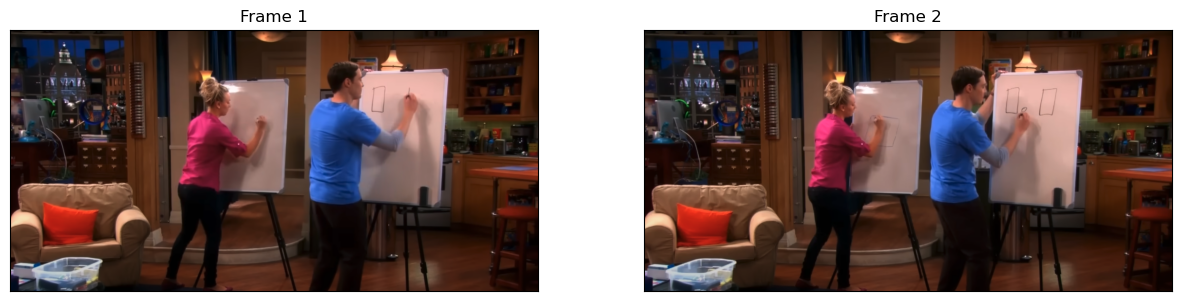

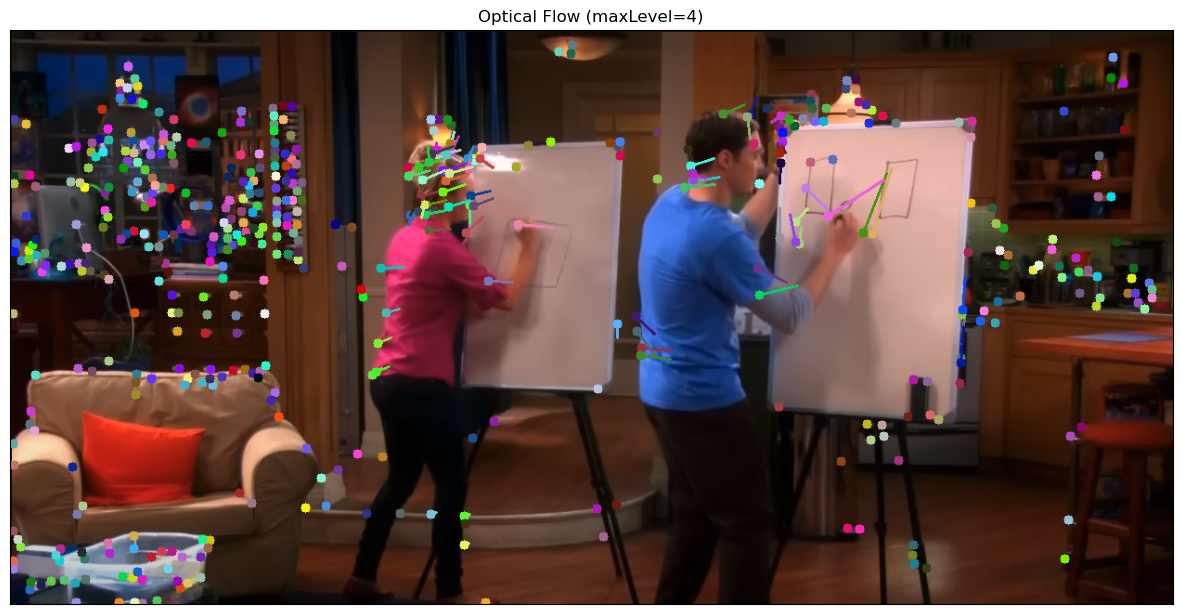

Pyramid Level 0: Mean Error = 6.821137, Success Rate = 100.0% (500/500)
Pyramid Level 1: Mean Error = 6.427612, Success Rate = 100.0% (500/500)
Pyramid Level 2: Mean Error = 5.482676, Success Rate = 100.0% (500/500)
Pyramid Level 3: Mean Error = 5.227135, Success Rate = 100.0% (500/500)
Pyramid Level 4: Mean Error = 5.229268, Success Rate = 100.0% (500/500)
Pyramid Level 5: Mean Error = 5.229240, Success Rate = 100.0% (500/500)
Pyramid Level 6: Mean Error = 5.229240, Success Rate = 100.0% (500/500)
Pyramid Level 7: Mean Error = 5.229240, Success Rate = 100.0% (500/500)
Pyramid Level 8: Mean Error = 5.229240, Success Rate = 100.0% (500/500)
Pyramid Level 9: Mean Error = 5.229240, Success Rate = 100.0% (500/500)
Pyramid Level 10: Mean Error = 5.229240, Success Rate = 100.0% (500/500)


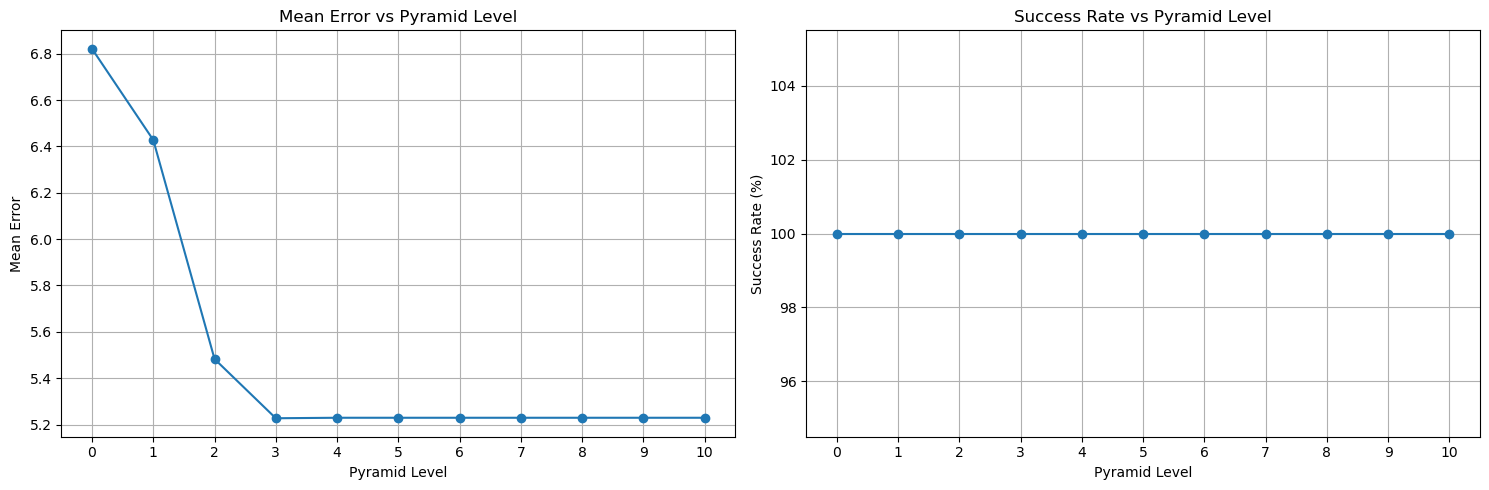

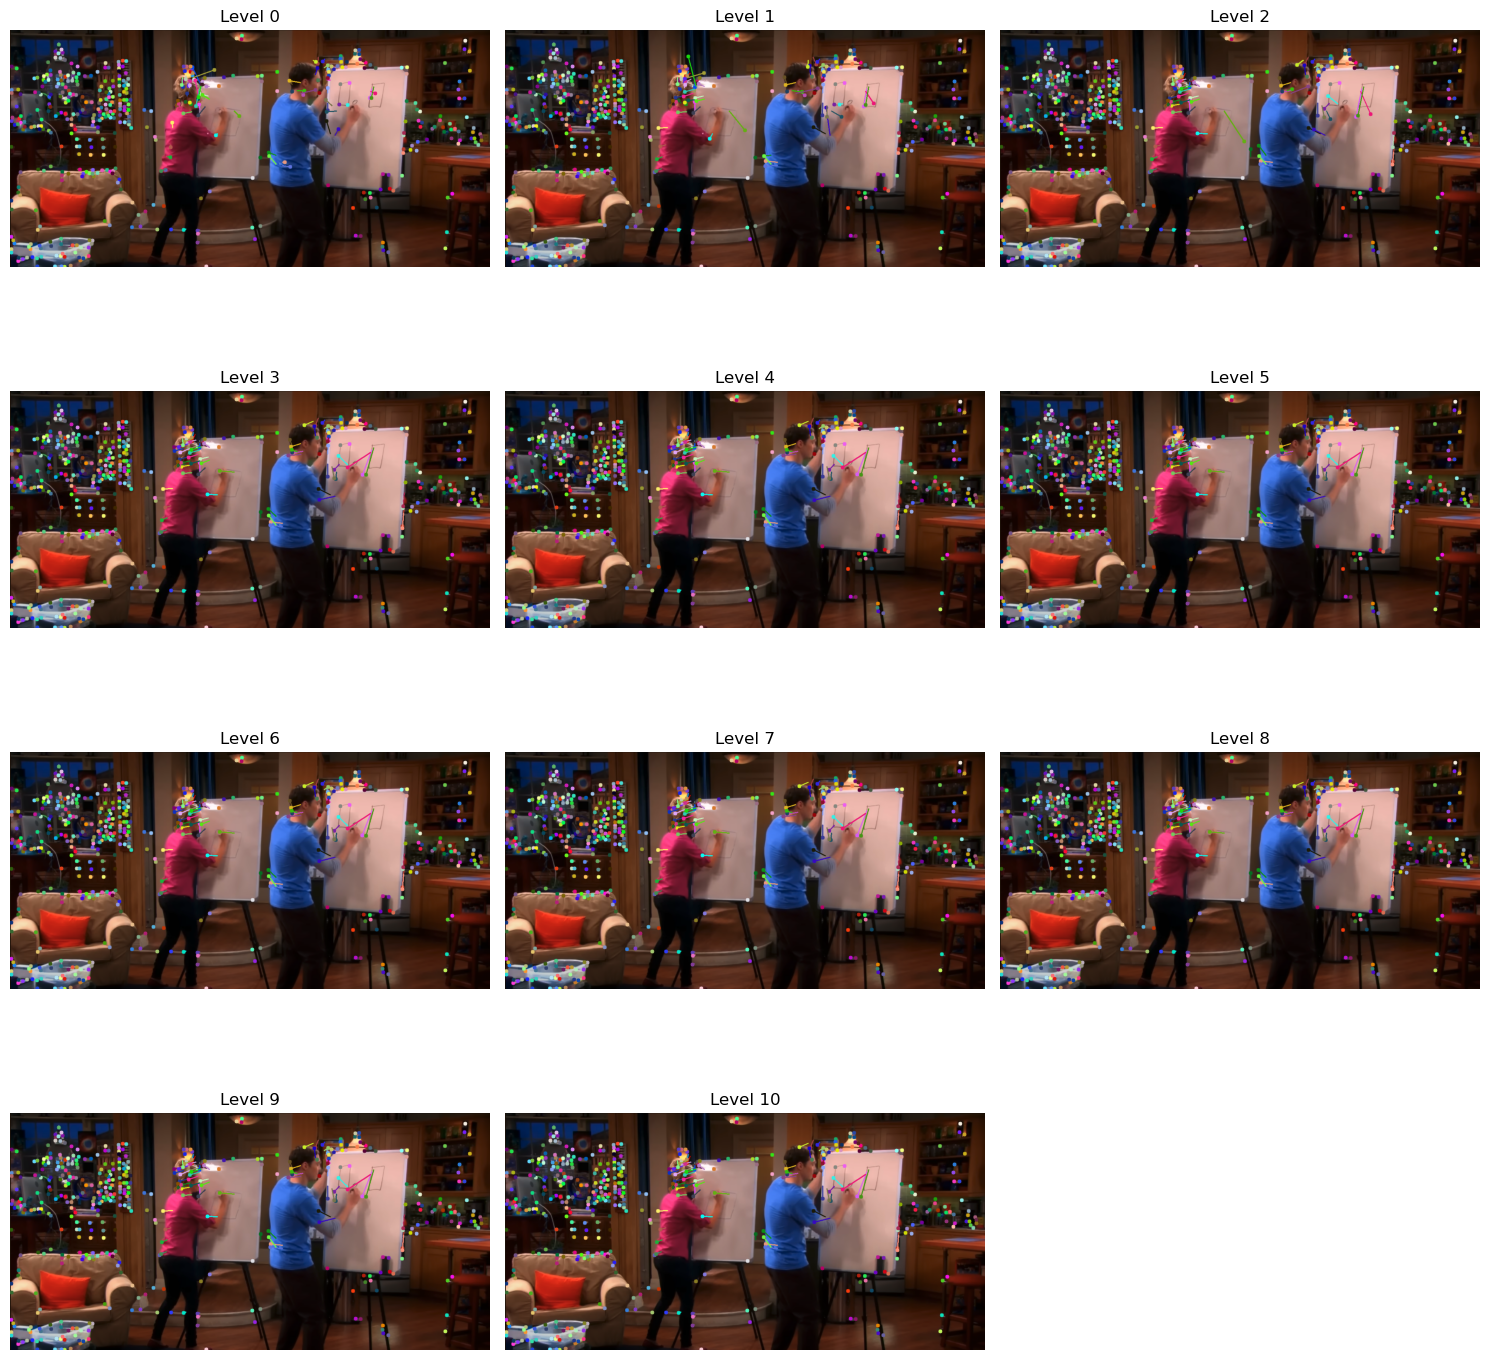

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Heavily inspired by tutorial

frame1 = cv2.imread(path + 'frame1.png')
frame2 = cv2.imread(path + 'frame2.png')


frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)


if frame1_gray.shape != frame2_gray.shape:
    h, w = min(frame1_gray.shape[0], frame2_gray.shape[0]), min(frame1_gray.shape[1], frame2_gray.shape[1])
    frame1_gray = frame1_gray[:h, :w]
    frame2_gray = frame2_gray[:h, :w]
    frame1 = frame1[:h, :w]
    frame2 = frame2[:h, :w]


feature_params = dict(maxCorners=500, 
                      qualityLevel=0.01,  
                      minDistance=7,      
                      blockSize=7)       

p1 = cv2.goodFeaturesToTrack(frame1_gray, **feature_params)

print(f"Detected {len(p1)} features in the first frame.")

lk_params = dict(winSize=(15, 15),
                maxLevel=4,
                criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))


p2, status, err = cv2.calcOpticalFlowPyrLK(frame1_gray, frame2_gray, p1, None, **lk_params)


good_new = p2[status == 1]
good_old = p1[status == 1]


mask = frame2.copy()


color = np.random.randint(0, 255, (len(good_new), 3))


for i, (new, old) in enumerate(zip(good_new, good_old)):
    a, b = new.ravel().astype(int)
    c, d = old.ravel().astype(int)
    mask = cv2.line(mask, (a, b), (c, d), color[i].tolist(), 2)
    mask = cv2.circle(mask, (a, b), 5, color[i].tolist(), -1)


plt.figure(figsize=(15, 15))
plt.subplot(121), plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.title("Frame 1"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
plt.title("Frame 2"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.title("Optical Flow (maxLevel=4)"), plt.xticks([]), plt.yticks([])
plt.show()


max_levels = range(0, 11)
mean_errors = []
flow_images = []
success_rates = []

for level in max_levels:
   
    lk_params['maxLevel'] = level
    

    p2_level, status_level, err_level = cv2.calcOpticalFlowPyrLK(
        frame1_gray, frame2_gray, p1, None, **lk_params
    )
    

    good_status = status_level.ravel() == 1
    success_rate = np.sum(good_status) / len(good_status) * 100
    success_rates.append(success_rate)
    
    if np.sum(good_status) > 0:
        mean_error = np.mean(err_level[good_status])
        mean_errors.append(mean_error)
    else:
        mean_errors.append(0)
    

    good_new = p2_level[good_status].reshape(-1, 2)
    good_old = p1[good_status].reshape(-1, 1, 2).squeeze()
    

    mask = frame2.copy()
    

    color = np.random.RandomState(42).randint(0, 255, (len(good_new), 3))
    

    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel().astype(int)
        c, d = old.ravel().astype(int)
        mask = cv2.line(mask, (a, b), (c, d), color[i % len(color)].tolist(), 2)
        mask = cv2.circle(mask, (a, b), 5, color[i % len(color)].tolist(), -1)
    
    flow_images.append(mask)
    
    print(f"Pyramid Level {level}: Mean Error = {mean_errors[-1]:.6f}, " +
            f"Success Rate = {success_rate:.1f}% ({np.sum(good_status)}/{len(good_status)})")


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(max_levels, mean_errors, 'o-')
plt.title('Mean Error vs Pyramid Level')
plt.xlabel('Pyramid Level')
plt.ylabel('Mean Error')
plt.grid(True)
plt.xticks(max_levels)

plt.subplot(1, 2, 2)
plt.plot(max_levels, success_rates, 'o-')
plt.title('Success Rate vs Pyramid Level')
plt.xlabel('Pyramid Level')
plt.ylabel('Success Rate (%)')
plt.grid(True)
plt.xticks(max_levels)

plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 15))
for i, level in enumerate(max_levels):
    plt.subplot(4, 3, i+1)
    plt.imshow(cv2.cvtColor(flow_images[i], cv2.COLOR_BGR2RGB))
    plt.title(f'Level {level}')
    plt.axis('off')
    
plt.tight_layout()
plt.show()
    

The plot shows us that error rapidly decreases with the pyramid level, before reaching a plateau of mean error. This suggests that increasing the pyramid level has a great effect on the motion detection, but after a point it becomes redundant, and does not offer improvements. 

This is also reflected in the quality of the optical flow mapping on the images. There is quite a big disparity between the first couple of images, but between image 6 and 10, there is nothing distinguishably different between them. 

